# Table writer for pyOrbit simulations

Remember to check that the values in the tables have to be divided by n! where n is the multipole order, so for the MADx mutipole `knl:={k0,k1,k2,k3}`, the table has to be 
```
k0 --> k0
k1 --> k1
k2 --> k2/2! = k2/2
k3 --> k3/3! = k3/6
and so on for decapoles, duodecapoles and so on ...
```
This is because of how the flat files are generated by PTC...


In [3]:
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generating function

So where do you get the values from

In [12]:
# golden values for the bump
bsw40              =     0.003498034648 
bsw42              =     -0.01422287844 
bsw43              =      0.01290524313 
bsw44              =    -0.006001526439 
BSS_max = 2*1.11828e-01 #from twiss


nstep = 500.

t = np.arange(0,nstep+1,1)/nstep * np.pi/2
t = np.append(t, t+np.pi/2)
# strengths for the simulation
#sextupole strength
sexStren = BSS_max*np.cos(t) 

#quadrupole strength
bsw40_val = bsw40*np.sin(t)
bsw42_val = bsw42*np.sin(t)
bsw43_val = bsw43*np.sin(t)
bsw44_val = bsw44*np.sin(t)

assert len(BSS_val) == len(bsw40_val) == len(bsw42_val) == len(bsw43_val) == len(bsw44_val)

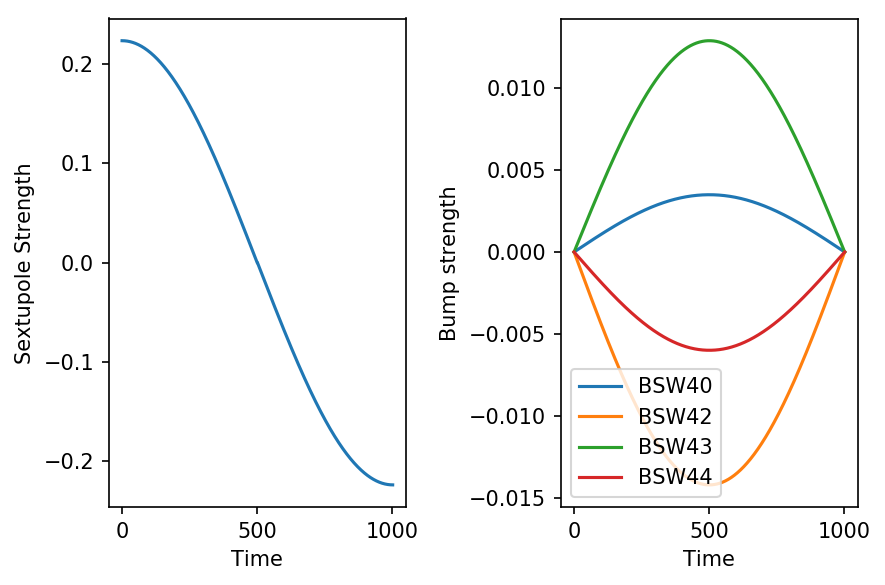

In [13]:
fig, ax = plt.subplots(1,2)
fig.dpi=150

ax[0].plot(sexStren)

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Sextupole Strength')
# ax[0].set_xlim(0,500)


ax[1].plot( bsw40_val,label='BSW40')
ax[1].plot( bsw42_val,label='BSW42')
ax[1].plot( bsw43_val,label='BSW43')
ax[1].plot( bsw44_val,label='BSW44')

ax[1].set_xlabel('Time')
ax[1].set_ylabel('Bump strength')
# ax[1].set_xlim(0,500)
ax[1].legend()

plt.tight_layout()

In [17]:
print(sexStren[501])
print(sexStren[1001])

1.36949802255e-17
-0.223656


In [18]:
# I want 4 tables for the 4 sextupoles in the bump
sex40 = sexStren*(bsw40/bsw42)
sex42 = sexStren
sex43 = sexStren*(bsw43/bsw42)
sex44 = sexStren*(bsw44/bsw42)

In [19]:
from scipy.constants import c
nstep = 500

gammar = 2.490380561 #from madx
circumf = 628.3185307

betar = np.sqrt(1-(1/(gammar*gammar)))
Trev = (circumf)/(betar*c)

# Write the strength files
files from index 501 to 1001 are the ramp-down of the bump

In [20]:
#sextupoles
with open('sext40.dat','w') as f:
    f.write(str(nstep)+' '+str(Trev)+' '+str(1)+'\n')
    f.write('3'+'\n') # 3=vary sextupole component
    for k in range(nstep):
        f.write(str(k+1)+' '+str(sex40[501+k]/2)+' '+str(0.0)+'\n')
    f.close()
with open('sext42.dat','w') as f:
    f.write(str(nstep)+' '+str(Trev)+' '+str(1)+'\n')
    f.write('3'+'\n') # 3=vary sextupole component
    for k in range(nstep):
        f.write(str(k+1)+' '+str(sex42[501+k]/2)+' '+str(0.0)+'\n')
    f.close()
with open('sext43.dat','w') as f:
    f.write(str(nstep)+' '+str(Trev)+' '+str(1)+'\n')
    f.write('3'+'\n') # 3=vary sextupole component
    for k in range(nstep):
        f.write(str(k+1)+' '+str(sex43[501+k]/2)+' '+str(0.0)+'\n')
    f.close()
with open('sext44.dat','w') as f:
    f.write(str(nstep)+' '+str(Trev)+' '+str(1)+'\n')
    f.write('3'+'\n') # 3=vary sextupole component
    for k in range(nstep):
        f.write(str(k+1)+' '+str(sex44[501+k]/2)+' '+str(0.0)+'\n')
    f.close()

In [21]:
#bumpers
with open('BSW40.dat','w') as f:
    f.write(str(nstep)+' '+str(Trev)+' '+str(1)+'\n')
    f.write('1'+'\n') # 3=vary sextupole component
    for k in range(nstep):
        f.write(str(k+1)+' '+str(bsw40_val[501+k])+' '+str(0.0)+'\n')
    f.close()
with open('BSW42.dat','w') as f:
    f.write(str(nstep)+' '+str(Trev)+' '+str(1)+'\n')
    f.write('1'+'\n') # 3=vary sextupole component
    for k in range(nstep):
        f.write(str(k+1)+' '+str(bsw42_val[501+k])+' '+str(0.0)+'\n')
    f.close()
with open('BSW43.dat','w') as f:
    f.write(str(nstep)+' '+str(Trev)+' '+str(1)+'\n')
    f.write('1'+'\n') # 3=vary sextupole component
    for k in range(nstep):
        f.write(str(k+1)+' '+str(bsw43_val[501+k])+' '+str(0.0)+'\n')
    f.close()
with open('BSW44.dat','w') as f:
    f.write(str(nstep)+' '+str(Trev)+' '+str(1)+'\n')
    f.write('1'+'\n') # 3=vary sextupole component
    for k in range(nstep):
        f.write(str(k+1)+' '+str(bsw44_val[501+k])+' '+str(0.0)+'\n')
    f.close()

## Sanity check
Read back the files and plot